# 🍿 Movie Review Sentiment Analysis 😀😡

- Classify whether a movie review is positive or negative
- This can provide information to help relevant parties understand the satisfaction rate of the movies and how they change over time, even though there are biases inherent in using reviews and questionnaires in the data collection process.

In [1]:
import pandas as pd
error_msg = '''# need to download https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews first
# alternatively, go to https://www.kaggle.com/code/carsoncheng/review-sentiment'''
train_df = None
try:
    global train_df
    train_df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
except:
    print(error_msg)

# need to download https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews first
# alternatively, go to https://www.kaggle.com/code/carsoncheng/review-sentiment


In [2]:
train_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Write Your Observations Here

- _____ is the feature column.
- ____ is the label column.
- The label column (needs / does not need) label encoding (remove the incorrect option)

# Text cleaning

- Remove special characters (such as \<br />\, which are line breaks)

In [3]:
train_df['review'] = train_df['review'].str.replace("<br />", "", regex=False)

# 📈 Visualization of common words

- WordCloud is a very good tool for this

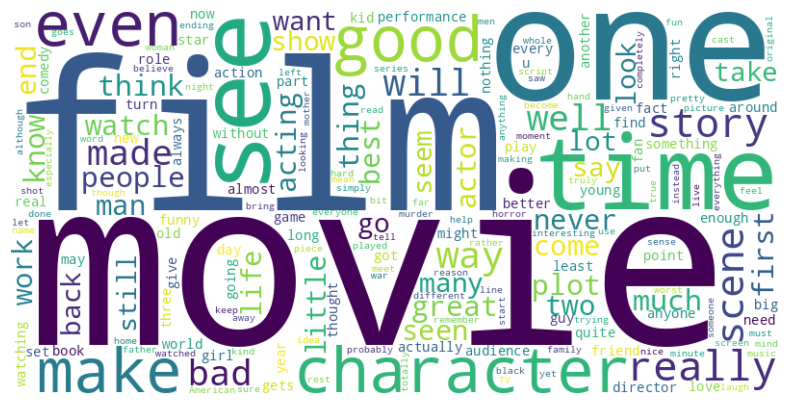

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = "".join([x for x in train_df.iloc[:500]['review']]) # collect some reviews from train_df
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # the "br"s you see are line breaks

# Data deduplication and encoding

In [5]:
train_df = train_df.drop_duplicates()

In [6]:
train_df['sentiment'].value_counts()

sentiment
positive    24884
negative    24697
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
train_df['sentiment_encoded'] = le.fit_transform(train_df['sentiment'])
import random
lst = list(range(len(train_df)))
random.seed(42)
random.shuffle(lst)
threshold = int(len(lst) * 0.8)
train_idxs, val_idxs = lst[:threshold], lst[threshold:]
#X_train, X_val, y_train, y_val = train_test_split(train_df['review'], train_df['sentiment_encoded'], test_size=0.2, random_state=42)
X_train, X_val = train_df['review'].iloc[train_idxs], train_df['review'].iloc[val_idxs]
y_train, y_val = train_df['sentiment_encoded'].iloc[train_idxs], train_df['sentiment_encoded'].iloc[val_idxs]

/tmp/ipykernel_48/769959417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['sentiment_encoded'] = le.fit_transform(train_df['sentiment'])


# Model training

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
print("Feature extraction using vectorizer")
vec = _______________() # your code here
Xt = vec.fit_transform(X_train)
Xv = vec.transform(X_val)
#svc = LogisticRegression(class_weight='balanced')
print("Feature extraction complete, using traditional ML methods")
svc = LinearSVC()
svc.fit(Xt, y_train)
train_pred = svc.predict(Xt)
print(classification_report(y_train, train_pred))
val_pred = svc.predict(Xv)
print(classification_report(y_val, val_pred))

Feature extraction using vectorizer
Feature extraction complete, using traditional ML methods
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19796
           1       1.00      1.00      1.00     19868

    accuracy                           1.00     39664
   macro avg       1.00      1.00      1.00     39664
weighted avg       1.00      1.00      1.00     39664

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4901
           1       0.87      0.87      0.87      5016

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Write Your Observations Here

- Using CountVectorizer, the validation macro average F1 score is _______
- Using TfidfVectorizer, the validation macro average F1 score is _______
- ____________ is the better vectorizer.

# 📈 Visualizing wrongly predicted samples

In [22]:
import numpy as np
errors = np.array(val_idxs)[np.where(val_pred != y_val)]

In [29]:
# take a sample at random
random_error_idx = random.sample(errors.tolist(), 1)[0]
print(train_df['review'].iloc[random_error_idx])
print(train_df['sentiment'].iloc[random_error_idx])

I have spent the last week watching John Cassavetes films - starting with 'a woman under the influence' and ending on 'opening night'. I am completely and utterly blown away, in particular by these two films. from the first minute to the last in 'opening night' i was completely and utterly absorbed. i've only experienced it on a few occasions, but the feeling that this film was perfect lasted from about two thirds in, right through till the credits came up. everything about this film, from the way it was shot, the incredible performance of Gena Rowlands, the credits, the opening, the music, the plot, the sense of depth, the pace, the tenderness, the originality, the characters, the deft little moments.... for me, is truly sublime. i couldn't agree more with the previous comment about taking it to a desert island because the sheer depth of this film is something to behold. if your unlucky enough to have a house fire, i guarantee that instead of making a last ditch attempt to rescue that